# Thoughts about the subway

## Motivation

I really like people watching when I am on public transit. I know the word to describe the realization that the people around you have as vivid lives as yours is called sonder (just because I've looked it up so often) but its interesting to try to work out what you think a person's life may be like just based on the short amount of time that you will have been in the same vicinity as them. This is a very roundabout spiel that explains a little bit about the question that I have now. In my watching of people and being on a lot of public transit I've observed some trends in the way that subway cars are populated. 

At first I was deadset on the idea that they were discretely normally distributed, in that the most populated subway car was the one in the center and the density of each subway car would decrease the further away it was from the middle car. Later, however, I became aware of some nuance in this distribution, how time of day or stop at which the subway was affected the variance and realized shape of the distribution. 

In general, I find the question pretty interesting as I find myself often moving towards the extremes of the subway train in hopes of being able to more easily find a seat and wanted to build some sort of generalized game-theory behaviour model that would give some insight about the decision making process of an individual when faced with the choice of which subway car to try to enter. Because clearly if there was no cost or necessary "mental capital" associated with thinking to move and to then physically move to subway cars that are likely to be less dense then all subway trains would be uniformly distributed.

In a more academia focussed aspect, however, I find myself to be quite interested in urban and spatial economics and the question of trying to optimize the organization is what tends to ocupy my mind during my time spend on public transit. There could be an argument made that in an ideal world we would place subway stop entrances strategically based on where the density is least in order to minimize costs for an individual and make the density of a subway train evenly distributed.

## Initial Notes

There is of course no all encompassing model but I do want to try to get pretty close to including factors that would be involved. For example, although an informed individual may have a decent guess as to how crowded a particular subway train will be in general depending on the time of day and location of the subway stop, there is always a degree of undertainty that we should bake into the model.

Although I've found a couple of data sources that look somewhat promising, just to make sure that this project doesn't take an unreasonable amount of time I won't deal with any of the estimating.

## Building the Model

Although people are into all sorts of weird stuff, we will stick to concepts that I personally think most individuals value:
 * I think on average, most people would rather sit down on the subway than stand up. 
 * The above preferences increases the longer the commute an individual has.
 * People dislike having to be in a dense subway car.

The shape of the utility curves is something that can get very complicated. Based on my setup and assumptions above, the curve should be inversely proportional to the density of a subway car and the duration of a subway car. But I think the first bullet point speaks to a jump in the utility in terms of the density at which all the seats on a subway car are taken up. This requires a bit more information about the make of subway cars so I'll leave that to later if I happen to have enough time to think about it.

I am also going to assume that the density of a subway car is related to the hour in which the ride takes place (where the peak times are around work start and end times, 9am and 5pm), the stop in which your subway trip begins (where the density is lower the closer to the the ends of the route the subway stops at). Finally, my initial assumption was that population density is approximatly truncated normally distributed (with the max density being 200 and the minimum being 0) with regards to the following variables:
 * $x \in [-5,5]\cap \mathbb{Z}$: the subway car that you choose where 0 is the middle subway car.
 * $t \in \mathbb{R}^+$: the length of your subway trip.
 * $h \in [0,24)$: the hour of the day that your trip takes place.
 * $s \in [0,66]\cap \mathbb{Z}$: the stop at which your subway trip begins.
 
Specifically, let's say that $\rho$ is normally distributed with mean $x_0e^{-x^2} + h_0e^{-(h-9)^2 - (h-17)^2} + s_0e^{-(s-33)^2}$ and standard deviation $\sigma$. In reality, a truncated normal distribution would be more apt but the derivation for first order condition was so messy so I'll put that in some appendix type section at the end. To provide a bit more commentary about why I've chosen this specific distribution; it is mostly because this distribution is relatively easy to handle when taking derivatives (as opposed to something like absolute values) and I wanted to use functions that were symmetric, yield lower values for higher absolute input numbers, and yield higher values for lower absolute input numbers.
 
And with all this in mind, let's write the utility function as $$u(\rho, t) = -ce^{-x^2} + a\exp\left(x_0e^{-x^2} + h_0e^{-(h-9)^2 - (h-17)^2} + s_0e^{-(s-33)^2}\right),$$ where an individual's maximization problem is $$\max_{x}\mathbb{E}\left[u(\rho, t)|x,h,s\right].$$

## Optimizing Individual Utility



This problem is nice in the sense that we aren't worrying about any equilibria with respect to multiple agents and rather are just concerning ourselves with one agent's choices (we could say that all the information regarding the choices of other agents is baked into the probability distribution of density). Sparing all the algebra, we can then continue to write
$$\begin{align}\max_{x}\mathbb{E}\left[u(\rho, t)|\,x,h,s\right] = \max_{x}\mathbb{E}\left[-ce^{-x^2} + ae^{-\frac{\rho}{b_1}\frac{t}{b_2}}\big| \,x,h,s\right] \end{align}$$ $$= \max_{x}-ce^{-x^2} + \mathbb{E}\left[ae^{-\frac{\rho}{b_1}\frac{t}{b_2}}\big| \,x,h,s\right].$$

And we get that the optimal subway car for one such individual is (given that I haven't made any computational errors) $$x^2 = \frac{b_1b_2}{tx_0}\ln\left(\frac{ax_0t}{cb_1b_2}\right) - \frac{1}{x_0}\left(h_0e^{-(h-9)^2 - (h-17)^2} + s_0e^{-(s-33)^2}\right)$$

Note the symmetry of choosing an optimal $x$, the agent doesn't care if they choose $x$ or $-x$ since the way we have formulated the problem is with a lot of baked in symmetry. Of course there are a lot of unknowns in this expression but the general implications of this expression are logically consistent with what we would expect, as out expected density grows throught the $h_0e^{-(h-9)^2 - (h-17)^2} + s_0e^{-(s-33)^2}$ term, the optimal subway car becomes closer to the center as it makes less sense to commit that much effort for a smaller decrease in density whereas as the cost of walking to further subway cars decreases the first term on the left hand side of the expression increases and thereby makes the optimal car choice further away from the center since it's less costly for the agent to seek out cars with less population density.

## Visualizing the Problem

So far we have an equation that expresses the relationship between the optimal subway car choice but it's a bit abstract (at least to me it is) so I'll make a few visualizations to go with it.

In [17]:
import schemdraw
schemdraw.use('svg')
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from ipywidgets import interact




def f_util(x, t, h, c, a, b1, b2, x0, h0, s0, s):
    return -c*np.exp(-x**2) + a*np.exp((-t/(b1*b2))*(x0*np.exp(-x**2)+ h0*np.exp(-(h-9)**2-(h-17)**2) + s0*np.exp(-(s-33)**2)))

def f_optimalx(t, h, c, a, b1, b2, x0, h0, s0, s):
    x_square = ((b1*b2)/(t*x0))*np.ln((a*x0*t)/(c*b1*b2)) - (1/x0)*(h0*np.exp(-(h-9)**2-(h-17)**2) + s0*np.exp(-(s-33)**2))
    return np.sqrt(x_square), -np.sqrt(x_square)

xs = np.linspace(-5, 5, 11)

init_t = 5
init_h = 1
init_s = 1
init_c = 1
init_a = 1
init_b1 = 1
init_b2 = 1
init_x0 = 1
init_h0 = 1
init_s0 = 1

# Create the figure and the line that we will manipulate
fig_util, ax_util = plt.subplots()
line_util, = ax_util.plot(xs, f_util(xs, init_t, init_h, init_c, init_a, init_b1, init_b2, 
                                     init_x0, init_h0, init_s0, init_s), lw=2)
ax_util.set_xlabel('Subway Car')

# adjust the main plot to make room for the sliders
fig_util.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
ax_t = fig_util.add_axes([0.25, 0.1, 0.65, 0.03])
t_slider = Slider(
    ax=ax_t,
    label='Time of Day',
    valmin=0,
    valmax=24,
    valinit=init_t,
)

# Make a vertically oriented slider to control the amplitude
ax_c = fig_util.add_axes([0.1, 0.25, 0.0225, 0.63])
c_slider = Slider(
    ax=ax_c,
    label="Cost of walking",
    valmin=0,
    valmax=10,
    valinit=init_c,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f_util(xs, ax_t, init_h, c_slider, init_a, init_b1, init_b2, 
                                     init_x0, init_h0, init_s0, init_s))
    fig.canvas.draw_idle()


# register the update function with each slider
t_slider.on_changed(update)
c_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig_util.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

ModuleNotFoundError: No module named 'matplotlib.backends.backend_webagg_core'

[ 1.          0.99999809  0.99790313  0.71111102 -1.82729725 -4.99999386
 -1.82729725  0.71111102  0.99790313  0.99999809  1.        ]


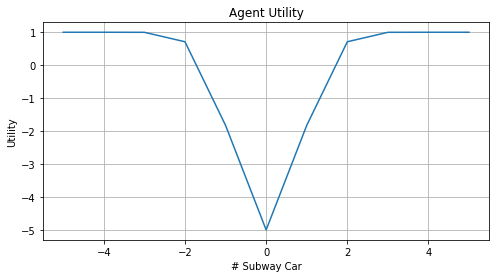

<function __main__.util_plot(t, c)>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

init_t = 5
init_h = 1
init_s = 1
init_c = 1
init_a = 1
init_b1 = 1
init_b2 = 1
init_x0 = 1
init_h0 = 1
init_s0 = 1

def util_plot(t, c):
    h=init_h
    a=init_a
    b1=init_b1
    b2=init_b2
    x0=init_x0
    h0=init_h0
    s0=init_s0
    s=init_s
    
    xs = np.linspace(-5, 5, 11)
    ys = -c*np.exp(-np.power(xs,2)) + a*np.exp((-t/(b1*b2))*(x0*np.exp(-np.power(xs,2))+ h0*np.exp(-np.power(h-9,2)-np.power(h-17,2)) + s0*np.exp(-np.power(s-33,2))))
    print(ys)
    plt.figure(figsize=(8, 4))
    plt.plot(xs, ys)
    plt.xlabel('# Subway Car')
    plt.ylabel('Utility')
    plt.title('Agent Utility')
    plt.grid(True)
    plt.show()

interact(util_plot, t=(0,24,0.5), c=(0,10,0.2))

## Future Work

So far, I've only dealt with one agent whose decisions don't have an impact on the "market". I could also expand this scenario to include a finite set of agents who have similar (or dissimilar by changing the cost of walking to futher subway cars if I want to consider a very simple heterogenous agent model) utility preferences and see what the optimal allocation of subway car density then looks like. This may be something I will edit and repost.

## Reflections

At work, I keep whatever blog post idea that I'm working on at the time on my whiteboard and people notice it from time to time and talk to me about it. I've gotten a lot of really interesting feedback and insights about this specific problem. The main gist of it is that the distributions of density in a station may not be a very simple normal distribution but rather have multiple modes around where the staircases are placed in a given station. Other suggestions included to think about other motivations for people entering the specific subway car that they enter in such as planning for their future exit or people tending to actually have a preference for dense subway cars at nighttimes because they want to feel safer.

So far I can think of a couple of ways to bake these assumptions into the model (such as making the utility function itself also conditional on time of day - perhaps with some transformation such that by changing the time of day we can also change the shape and modality of the utility function - or making some unique way to classify the number of station on the line of stations in such a way that we can codifiy the conditional expectation of $\rho$ properly).

For now, I left the question as is right now without addressing these issues just because I wanted to post at least something instead of taking an exorbitant amount of time on trying to work around every potential nuance.

## Apendix

#### A. Truncated Normal Distribution

Consider that instead of assuming that population density in subways cars was normally distributed conditional on $x, s, h$ they were truncated normal. That is, we do not allow for negative density or for a car to carry more people than is possible; the pdf function is 0 at all values less than equal to 0 or greater than equal to 200. All this would change is the conditional expectation expression in maximization problem but it involves a bit more algebra for the first order conditions.